<h1 align ='center'> Procesamiento de Imágenes </h1>

**Integrantes:** 



# Índice

1. [Introducción](#introduccion)<br>

2. [Redes neuronales](#redes)<br>
    2.1 [Historia de las redes neuronales](#hist_neur)<br>
    2.2 [¿Qué es una red neuronal?](#def_neur)<br>
    2.3 [Ejemplo (cambio temperatura, ecuación lineal)](#ej_temp)<br>
    2.4 [Funciones de activación](#activacion)<br>

3. [Reconocimiento o clasificación de imágenes](#clasificacion)<br>
    3.1 [Aplicación](#apli)    


4. [Transformación de imágenes](#links)<br>
    4.1 [Ejemplo manipulación filtro](#dddd)<br>
    4.2 [Definición Kernel](#mm)<br>
    4.3 [Proceso de convolución](#convu)

5. [Redes Neuronales Convolucionales (CNN)](#links)<br>
    5.1 [¿Por qué son necesarias las CNN?](#ddd)<br>
    5.2 [Funcionamiento de las CNN](#ddd)<br>
    5.3 [Aplicación](#ddd)<br>
    5.4 [Definición neurona simple y compleja](#Assss)<br>
    5.5 [Definición capa convolucional y de agrupamiento](#dd)<br>
    5.6 [Aplicación](#ddd)<br>

6. [Conclusiones](#extras)<br>

7. [Referencias](#referencias)



# Introducción
<a id='introduccion'></a>

El procesamiento de imágenes es el conjunto de técnicas que se aplican a las imágenes digitales con el objetivo de modificar la calidad, cambiar algún aspecto o facilitar la búsqueda de información. En el procesamiento de imágenes se usan las redes neuronales convolucionales para reconocer patrones en imágenes, y así poder reconocerlos o cambiarlos libremente, como lo hacen las cámaras de seguridad, las maquinas de rayos X o los filtros de Instagram y Snapchat. 

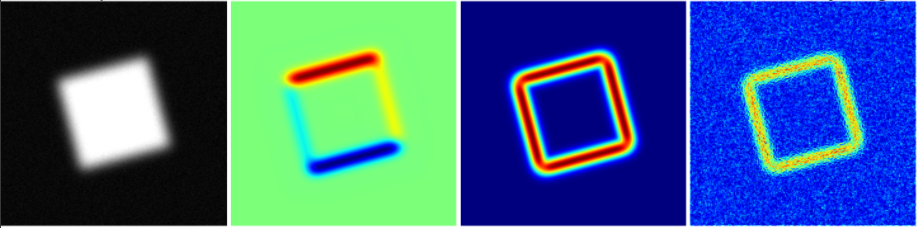

#Redes Neuronales
<a id='hist_neur'></a>

##Historia de las redes neuronales
<a id='hist_neur'></a>


Ésta comienza en 1936 con **Alan Turing** al momento de estudiar el cerebro como una forma de ver el mundo de la computación.

Sin embargo en 1943 el neurofisiólogo **Warren McCulloch**, y el matemático **Walter Pitts** fueron los primeros teóricos que concibieron los fundamentos de la computación neuronal cuando lanzaron una teoría acerca de la forma de trabajar de las neuronas, modelando una **Red Neuronal Simple** mediante circuitos eléctricos. 

Entre 1957-1960 el científico **Frank Rosenblatt**, inspirado en el trabajo anterior creó el **Perceptron**, la unidad desde donde nacería y se potenciarían las redes neuronales artificiales.

En 1960 **Bernard Widroff** y **Marcian Hoff** desarrollaron el modelo Adaline, la primera red neuronal aplicada a un problema real (filtros adaptativos para eliminar ecos en las líneas telefónicas).

En 1969 **Marvin Minsky** y **Seymour Papert** demostraron matemáticamente que el Perceptrons no era capaz de resolver problemas relativamente fáciles, tales como el aprendizaje de una función no-lineal, probando la debilidad del mismo, abriendo paso a poder mejorarlo a futuro.

En 1977 **Stephen Grossberg** propuso la **Teoría de Resonancia Adaptada (TRA)**, que simulaba otras habilidades del cerebro: memoria a largo y corto plazo

En 1986 **David Rumelhart** y **G. Hinton**. Redescubrieron el algoritmo de aprendizaje de propagación hacia atrás (backpropagation), que había sido propuesto anteriormente en 1974 por **Paul Werbos**.

En 1989 **Yann LeCun** crea la primera **Red Neuronal Convolucional (CNN)**, la cual estaba enfocada en el reconocimiento de letras manuscritas.

Desde 1990 en adelante se han desarrollado múltiples investigaciones y desarrollos, estos surgen sobre todo en el **área de control** y las empresas lanzan al mercado productos nuevos de hardware y software enfacados en su mayoría a la **simulación**

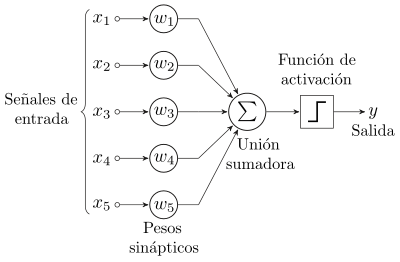

**Pérceptron**

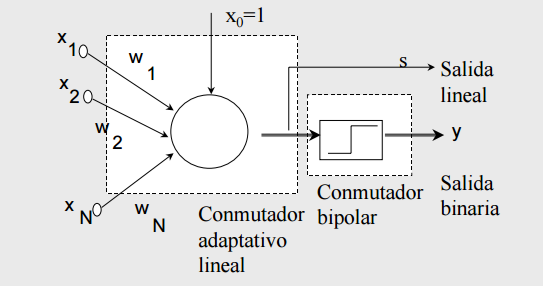

**Estructura de la red Adaline**

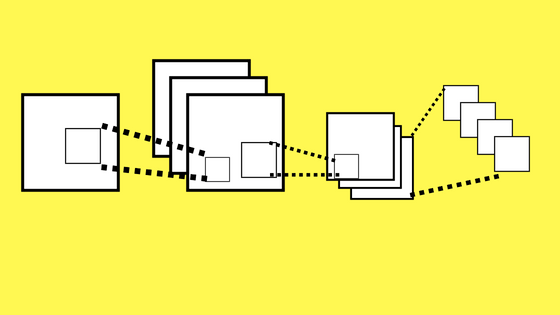

**Red neuronal convolucional**

##¿Qué es una red neuronal?

Las redes neuronales, en este caso las redes neuronales artificiales tratan de imitar el funcionamiento de las redes neuronales de los organismos vivos. Consisten en un conjunto de unidades, llamadas neuronas, conectadas entre sí por conexiones, las cuales se usan para transmitir información entre las neuronas. Cada neurona tiene un sesgo o diferencia y cada conexión tiene un peso que representa la importancia de esta información para la siguiente neurona. Las neuronas están agrupadas entre capas y capas ocultas para procesar el envío de información. Todas las redes neuronales tienen una capa de entrada y una de salida, y cada capa debe tener al menos una neurona.

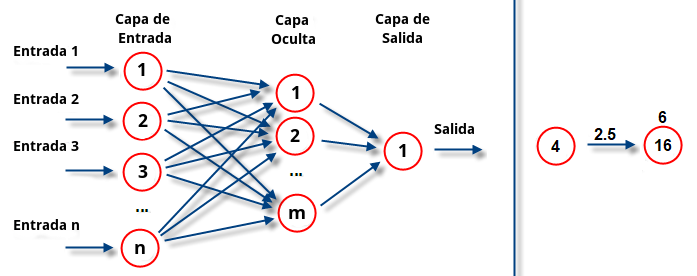

##Ejemplo (cambio temperatura, ecuación lineal)

En el machine learning se usan las redes neuronales para encontrar el proceso que puede convertir unas entradas determinadas en las salidas correspondientes, pero sin tener pista alguna sobre el proceso previo que se usa. E 
Por ejemplo, las vamos a usar para encontrar la ecuación que convierte grados centígrados a Fahrenheit, sin tener idea de que la ecuación es ℉=1,8•℃+32 y usando únicamente los valores de las temperaturas en ℃ y ℉.

In [1]:
import tensorflow as tf
import numpy as np
celsius = np.array([-87, -12, 0, 8, 26, 50, 104], dtype=float)
fahrenheit = np.array([-124.6, 10.4, 32, 46.4, 78.8, 122, 219.2], dtype=float)

ModuleNotFoundError: No module named 'tensorflow'

Creamos una red neuronal simple de una capa con una entrada, la cual se basa en el error cuadratico medio. Una red de este tipo solo puede resolver problemas de regresión que usan ecuaciones lineales.

In [ ]:
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

Hacemos un entrenamiento con los datos 1000 veces y observamos los errores que se generan en estas mediciones.

Comenzando entrenamiento...
Modelo entrenado!


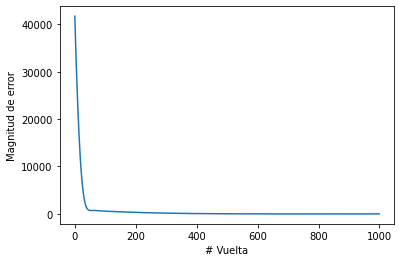

In [ ]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

import matplotlib.pyplot as plt
plt.xlabel("# Vuelta")
plt.ylabel("Magnitud de error")
plt.plot(historial.history["loss"])



Vemos que a partir de la vuelta numero 600 aproximadamente, ya el modelo no esta aprendiendo nada nuevo.

Ahora, con el modelo entrenado, lo usamos para hacer una prediccion.
La red neuronal tambien encuentra que los valores de la ecuacion lineal "m" y "b" son:

In [ ]:
temp_cel=float(input("Introduzca Temperatura en grados centigrados: "))
resultado = modelo.predict([temp_cel])

print("El resultado equivale a una temperatura de: " + str(resultado) + " grados fahrenheit!")

print("Variables internas del modelo")
print(capa.get_weights())

Introduzca Temperatura en grados centigrados: 87
El resultado equivale a una temperatura de: [[188.47495]] grados fahrenheit!
Variables internas del modelo
[array([[1.8008249]], dtype=float32), array([31.803179], dtype=float32)]


Si mejoramos la red neuronal, haciendo ahora que la red tenga 2 capas ocultas de tres neuronas, vemos que se se optimiza el modelo mucho mas rapido.

El resultado es [[212.]] fahrenheit!
Variables internas del modelo
[array([[-0.74410963, -0.3267886 ,  0.269114  ]], dtype=float32), array([-6.048967 , -4.4022427,  5.448684 ], dtype=float32)]
[array([[ 1.1818545 ,  0.5571551 , -0.41371518],
       [ 1.1284356 ,  0.30404705,  0.4402577 ],
       [-0.5572507 ,  0.4477986 ,  0.5236901 ]], dtype=float32), array([-5.476161 , -1.696435 ,  3.4315937], dtype=float32)]
[array([[-1.1654862 ],
       [-0.09194976],
       [ 0.44044185]], dtype=float32), array([4.5757017], dtype=float32)]


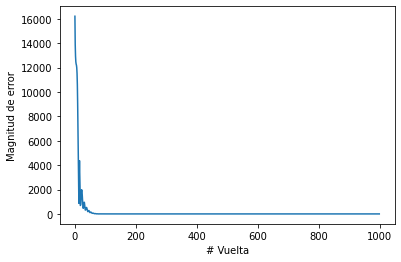

In [ ]:
import tensorflow as tf
import numpy as np

celsius = np.array([-87, -12, 0, 8, 26, 50, 104], dtype=float)
fahrenheit = np.array([-124.6, 10.4, 32, 46.4, 78.8, 122, 219.2], dtype=float)

capa = tf.keras.layers.Dense(units=1, input_shape=[1])
modelo = tf.keras.Sequential([capa])

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)

import matplotlib.pyplot as plt
plt.xlabel("# Vuelta")
plt.ylabel("Magnitud de error")
plt.plot(historial.history["loss"])


resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

print("Variables internas del modelo")
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Aqui vemos que el modelo con dos capas ocultas de tres neuronas cada una es mucho mas efectivo que el anterior modelo. A partir de la iteración 60 aproximadamente, ya el modelo esta listo para realizar predicciones.

##Funciones de activacion

Ahora, como mencionamos antes, una red neuronal basica solo puede resolver problemas lineales de regresion, pero para este ejemplo necesitarémos usar nuevas herramientas. Una de ellas es la función de activación. 

Una función de activación se encarga de cambiar la salida de la neurona, pasandola por una funcion. Normalmente se buscan funciones cuyas derivadas sean simples, para minimizar con ello el coste computacional. Entre las funciones mas usadas estan la funcion escalonada, la función lineal a trozos, la funcion sigmoide y la funcion exponencial.

Para la clasificacion de imagenes usaremos la **función RELU**, la cual transforma los valores introducidos multiplicando los negativos por cero y dejando los positivos según entran.

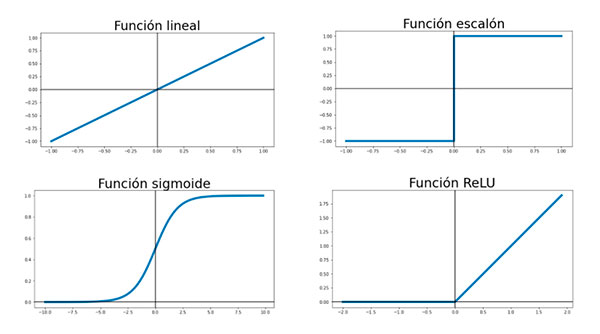

Ya con esta herramienta estamos listos para hacer el reconocimiento de imagenes. 

#Reconocimiento y clasificación de imágenes

##Aplicación

Primero que todo, el reconocimiento de una imagen ya no es un problema de regresión como en el anterior ejemplo, si no uno de clasificación. 

Los pasos para hacer el reconocimiento de imagen en el siguiente ejemplo son los siguiente: 

1.  Para simplificar el problema, usaremos imagenes en blanco y negro.
2.  Tomamos la imagen será descompuesta en pixeles, donde cada pixel equivaldrá a un numero entre 0 a 255 dependiendo de su intensidad.
3.  Reduciremos las imagenes a un tamaño 28x28 pixeles, 
4.  Luego tomaremos cada pixel como una entrada, lo que serán 784 neuronas de **entrada** y 10 neuronas de **salida**. 

En este ejemplo vamos a clasificar un conjunto de imagenes de prendas de vestir, entre 

***Camiseta, pantalon, sueter, vestido, saco, sandalia, camisa, tenis, bolsa y botín***.

 En el **aprendizaje supervisado**, como el que usa una red neuronal, es necesario hacer un **entrenamiento** a partir de unos datos. En el ejemplo anterior bastó con 7 ejemplos como base, pero para este caso ya que son muchas entradas y salidas, no será suficiente. 

Es por eso que tomamos como referencia la base de datos *fashion_mnist* con 70.000 imagenes de prendas de vestir, proporcionada por la empresa Zarando. 

Usaremos 60.000 para el entrenamiento de la red y 10.000 para probarlo. Tambien vemos las categorías de las prendas de vestir.



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    version=3.0.1,
    description='Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.',
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao and
                   Kashif Rasul and
                   Roland Vollgraf},
      title     = {Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning
                   Algorithms},
      journal   = {CoRR},
      volume

In [ ]:
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']
nombres_clases = metadatos.features['label'].names
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Agilizando el proceso, normalizaremos las entradas para pasar de entradas de 0 a 255 a numeros de 0 a 1. Esto se hace tambien para que la red aprenda mejor y mas rapido. Hacemos lo mismo para los datos de entrenamiento y prueba. Tambien agregaremos los datos a la **memoria caché** en lugar de la memoria de disco, para que el modelo aprenda mas rapido de sí mismo.

In [ ]:
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

Aqui mostramos como se toma a cada imagen y tambien algunas de las imagenes que usaremos como referencia junto con su clasificacion.

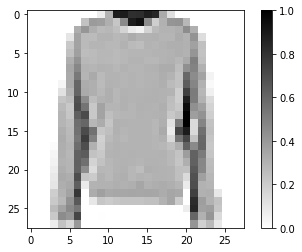

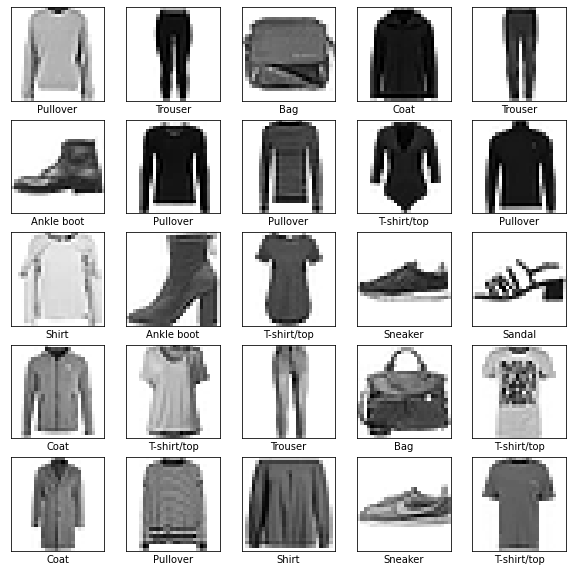

In [ ]:
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) 

import matplotlib.pyplot as plt
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)): #Tomaremos 25 imagenes y las pondremos en recuadros 5x5
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

Ahora si, creamos y compilamos el modelo y luego lo entrenamos con las 60.000 imagenes.

In [ ]:
#Crear el modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), #1 - blanco y negro
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion
])

#Compilar el modelo
modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

Para optimizar aún mas el proceso trabajaremos por lotes lo que permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente. Las funciones "shuffle" y "repeat" hacen que los datos esten mezclados de manera aleatoria para que la red sea justa y no se aprenda el orden de las cosas.

In [ ]:
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples
TAMANO_LOTE = 32 #Se asina un tamaño de lote para poder reducir tiempo de ejecución
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

Realizamos finalmente el entrenamiento de los datos y vemos como se reduce el error en el tiempo

Epoch 1/5
1875/1875 [==============================] - 14s 3ms/step - loss: 0.5250 - accuracy: 0.8143
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3912 - accuracy: 0.8592
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3538 - accuracy: 0.8699
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3298 - accuracy: 0.8784
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3148 - accuracy: 0.8841


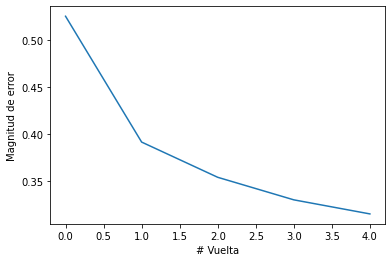

In [ ]:
import math
historial = modelo.fit(datos_entrenamiento, epochs=5, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

plt.xlabel("# Vuelta")
plt.ylabel("Magnitud de error")
plt.plot(historial.history["loss"])

Ahora con el modelo entrenado, probamos su efectividad con 25 imagenes. Debemos recordar que la red neuronal nunca es 100% efectiva. En general un modelo con un 85% o 90% es muy bueno.

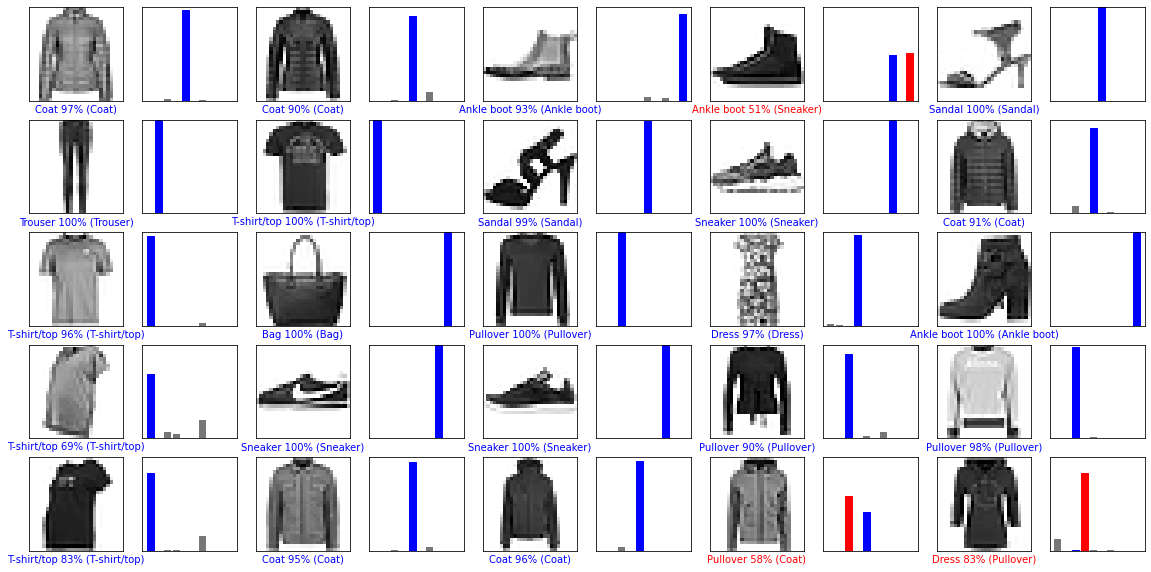

In [ ]:
#Imprimimos una muestra de 25 imagenes en la cual se puede ver los intentos de la red neuronal para clasificar
#con su correspondiente porcentaje de verosimilitud
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)
  
def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)
  
def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1]) 
  etiqueta_prediccion = np.argmax(arr_predicciones)
  
  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')
  
filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)

In [ ]:
#Probar una imagen suelta
imagen = imagenes_prueba[19] #En python se indexa desde 0, por lo tanto 24=25
imagen = np.array([imagen])
prediccion = modelo.predict(imagen)
print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])

Prediccion: Pullover


# Transformacion o filtro de imagenes

##Ejemplo de manipulación de filtros

Ahora utilizaremos algunos ejemplos de imagenes importadas, para esto usaremos el almacenamiento de Drive y las librerías correspondientes:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


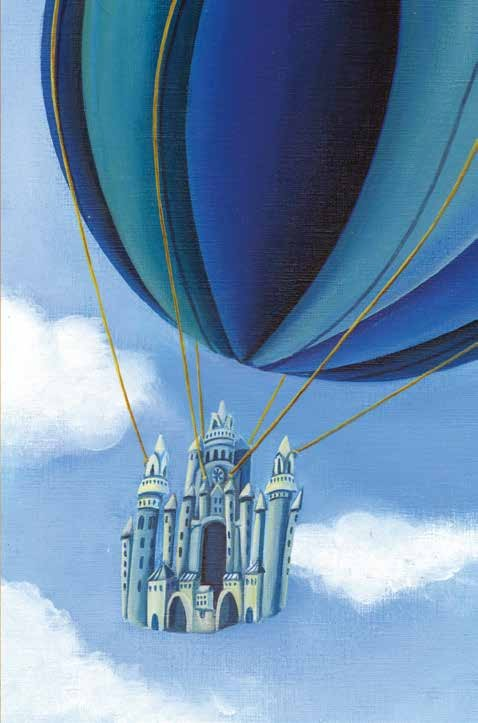

In [ ]:
#Importación de las librerías glob, math, matplotlib y skimage
from PIL import Image
from IPython.display import Image
from matplotlib import pyplot as plt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from math import sqrt
from skimage.color import rgb2gray
import glob
from skimage.io import imread


Image('/content/drive/MyDrive/MdD/017.jpg')#Muestra una imagen desde una ruta

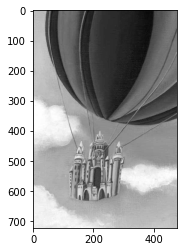

_______


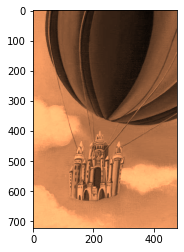

In [ ]:
imagen_prueba = glob.glob(r'/content/drive/MyDrive/MdD/017.jpg')[0] #Importa una imagen y crea el objeto
im_bn=imread(imagen_prueba, as_gray=True)
###
plt.imshow(im_bn,cmap='gray')
plt.show()
print('_______')

plt.imshow(im_bn,cmap='copper')
plt.show()
#Podemos utilizar diferentes filtros para procesar la imagen, dentro del parametro que usemos en cmap

## Definición de Kernel



En el procesamiento de imagenes el Kernel, o también llamado nucleo, mascara o matriz de convolucion, es una matriz que se utiliza para hacer efectos de desenfoque, nitidez, realce, deteccion de bordes, entre otros filtros. Dependiendo los valores de la matriz, el efecto sobre la imagen puede ser distinto. El Kernel es usado para extraer informacion, características importantes o patrones en una imagen.

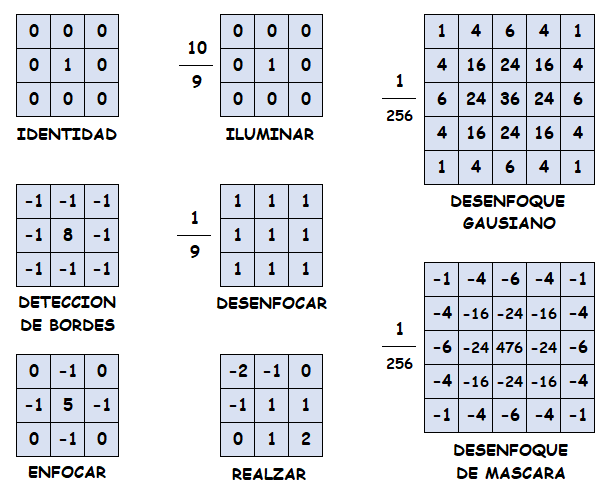

##Proceso de convolución

El proceso de convolución trabaja en conjunto con pixeles cercanos, a diferencia de las redes neuronales básicas que se enfocan en los pixeles por separado.

El proceso de convolucion usa el kernel para hacer el filtrado de imagenes de la siguiente manera:

1. Se define el kernel que se quiere usar y la matriz previamente pixelada y convertida a blanco y negro, tomando cada pixel como un numero de 0 a 255 dependiendo su intensidad.
2. Se coloca el kernel sobre el primer pixel y se hacen operaciones en el kernel segun los valores de las entradas en él.
3. El resultado se coloca sobre una nueva cuadricula del mismo tamaño y sobre la misma posicion.
4. Se repite, lo pasos 2 y 3 para cada pixel de la imagen original.
5. Los numeros resultantes se convierten nuevamente a una imagen a blanco y negro, dependiendo dicho valor en la escala de color. Si el numero supera 255 se tomará como 255 y si es negativo se tomará como 0.
El resultado de la filtracion será la nueva imagen obtenida.

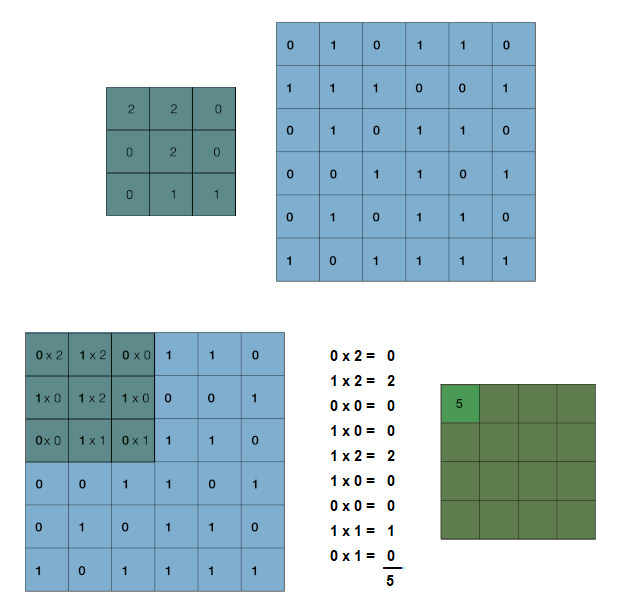

In [ ]:
from IPython.display import Image
Image(url='https://c.tenor.com/NNR7BkQ8Q7QAAAAi/convolution-math.gif')

#Redes neuronales convolucionales (CNN)
Las redes neuronales convolucionales (CNN, por su abreviatura en ingles) son un tipo de redes neuronales artificiales donde las neuronas artificiales, corresponden a campos receptivos de una manera muy similar a las neuronas en la corteza visual primaria de un cerebro biológico.

Estas redes son una **variación de un perceptron multicapa**, sin embargo, debido a que su aplicación es realizada en matrices bidimensionales, son muy efectivas para tareas de visión artificial, como en la clasificación y segmentación de imágenes, entre otras aplicaciones.


##¿Por qué son necesarias las CNN?



Como hemos comentado anteriormente existen diferentes tipos de redes neuronales, clasificadas segun el funcionamiento de sus neuronas, sus conexiones, sus funciones de activacion o según su modo de aprendizaje. 

Sus usos varían desde calculadoras, simuladores de juegos y reconocimiento de voz, hasta la deteccion de cancer, analisis de enfermedades hereditarias por el ADN y procesamientos economicos de un país.

En este caso al hablar de las redes neuronales convolucionales tenemos que tener en cuenta que estas han tenido una gran evolución en los ultimos años. Y su aporte al proceso de reconocimiento de imagenes es muy grande, ya que aunque el análisis realizado mediante redes neuronales basicas es muy bueno cuando se tiene una gran cantidad de entradas, estas solo funcionan cuando la imagen que queremos comparar está perfectamente centrada, no está rotada y es del mismo tamaño. 

En otras palabras, si las imagenes difieren demasiado a la referencia se ocasionan problemas. Para solucionar este inconveniente existen las **redes neuronales convolucionales**.

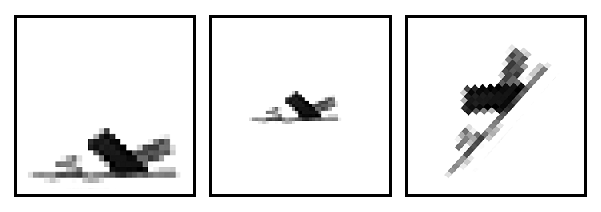

Aquí lo que importa es identificar las caracteristicas propias de una imagen en general. 

Por ejemplo, sin importar la caligrafía o la buena escritura, para identificar si en una imagen está el numero ocho bastará con identificar si existen dos formas circulares unidas o si está el numero cero solo habrá una.

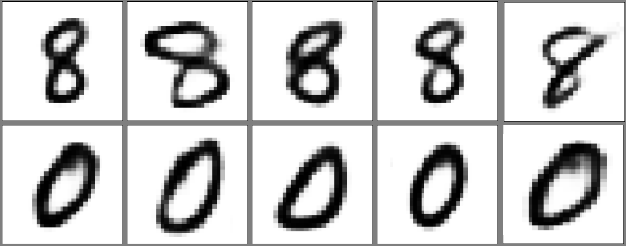

##Aplicación 

A continuación podremos ver el código correspondiente a las Redes Neuronales Convolucionales, utilizando distintos Kernels para crear filtros:

In [ ]:
%matplotlib inline

from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

def convolve(image, kernel):
	# Toma las dimensiones espaciales de la imagen, junto con las dimensiones espaciales del kernel
  (iH, iW) = image.shape[:2]
  (kH, kW) = kernel.shape[:2]
	# Guardamos las dimensiones de la imagen
  pad = (kW - 1) // 2
  image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)
  output = np.zeros((iH, iW), dtype="float32")
 
	# Genera un ciclo, que recorre la imagen seccion por seccion (x,y) 
  for y in np.arange(pad, iH + pad):
    for x in np.arange(pad, iW + pad):
			#Extra la sección de interes de la imagen extrayendo el centro de la misma 
      roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
			# Hace la convolución, teniendo en cuanta la multiplicación del kernel con la posición
			# sumando posteriormente y generando la matriz
			# the kernel, then summing the matrix
      k = (roi * kernel).sum()
      output[y - pad, x - pad] = k
      
  # Reescala la imagen resultante en un rango de 0 a 255
  output = rescale_intensity(output, in_range=(0, 255))
  output = (output * 255).astype("uint8")
  return output


# Construye el kernel de identidad
identity = np.array((
	[0, 0, 0],
	[0, 1, 0],
	[0, 0, 0]), dtype="int")

# Construye los kernels que generan un filtro de desenfoque
smallBlur = np.ones((7, 7), dtype="float") * (1.0 / (7 * 7))
largeBlur = np.ones((21, 21), dtype="float") * (1.0 / (21 * 21))

# Construye los kernels que generan un filtro de enfoque
sharpen = np.array((
	[0, -1, 0],
	[-1, 5, -1],
	[0, -1, 0]), dtype="int")

# Construye el kernel Laplaciano usado para detectar los bordes de la imagen
laplacian = np.array((
	[0, 1, 0],
	[1, -4, 1],
	[0, 1, 0]), dtype="int")

# Construye el kernel de bordado grueso usado para detectar los bordes de la imagen
edge = np.array((
	[-1, -1, -1],
	[-1, 8, -1],
	[-1, -1, -1]), dtype="int")

# Construye el kernel de luminosidad usado para detectar los bordes de la imagen
lighten = np.array((
	[1, 0, 0],
	[0, 0, 0],
	[0, 0, 1]), dtype="int")

# Construye el kernel Sobel para el eje X
sobelX = np.array((
	[-1, 0, 1],
	[-2, 0, 2],
	[-1, 0, 1]), dtype="int")

# Construye el kernel Sobel para el eje Y
sobelY = np.array((
	[-1, -2, -1],
	[0, 0, 0],
	[1, 2, 1]), dtype="int")

# Construcye the kernel bank
kernelBank = (
	("identidad", identity),
	("desenfoque_suave", smallBlur),
	("desenfoque_fuerte", largeBlur),
	("enfoque", sharpen),
	("laplaciano", laplacian),
	("bordes", edge),
	("iluminado", lighten),
	("sobel_x", sobelX),
	("sobel_y", sobelY)
)

# Carga la imagen y la convierte a escala de grises
image = cv2.imread('/content/drive/MyDrive/MdD/081.jpg',)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Un ciclo para aplicar los kernels
for (kernelName, kernel) in kernelBank:
	# Aplica el kernel utilizando la imagen en escala de grises 
	# utilizando la función de convolución creada y la libreria de filtros de OpenCV 
	print("[PROCESO] Aplicando el kernel {} :".format(kernelName))
	convoleOutput = convolve(gray, kernel)
	opencvOutput = cv2.filter2D(gray, -1, kernel)
	# Guarda las imagenes resultantes
	cv2.imwrite("original.jpg", gray)
	cv2.imwrite("081_1 {} - convolucional.jpg".format(kernelName), convoleOutput)
	cv2.imwrite("081_1 {} - libreria_opencv.jpg".format(kernelName), opencvOutput)

[PROCESO] Aplicando el kernel identidad :
[PROCESO] Aplicando el kernel desenfoque_suave :
[PROCESO] Aplicando el kernel desenfoque_fuerte :
[PROCESO] Aplicando el kernel enfoque :
[PROCESO] Aplicando el kernel laplaciano :
[PROCESO] Aplicando el kernel bordes :
[PROCESO] Aplicando el kernel iluminado :
[PROCESO] Aplicando el kernel sobel_x :
[PROCESO] Aplicando el kernel sobel_y :


##Funcionamiento de las CNN

Las CNN consisten en múltiples capas de filtros convolucionales de una o más dimensiones. Después de cada capa, por lo general se añade una función para realizar un mapeo causal no-lineal.

Como cualquier red empleada para **clasificación**, al principio estas redes tienen una fase de extracción de características compuesta de neuronas convolucionales, luego hay una reducción por muestreo y al final tendremos neuronas de perceptrón mas sencillas para realizar la clasificación final sobre las características extraídas.

La fase de **extracción** de características se asemeja al proceso estimulante en las células de la corteza visual. Esta fase se compone de capas alternas de neuronas convolucionales y neuronas de reducción de muestreo.

Según progresan los datos a lo largo de esta fase, se disminuye su dimensionalidad, siendo las neuronas en capas lejanas mucho menos sensibles a perturbaciones en los datos de entrada, pero al mismo tiempo siendo estas activadas por características cada vez más complejas.

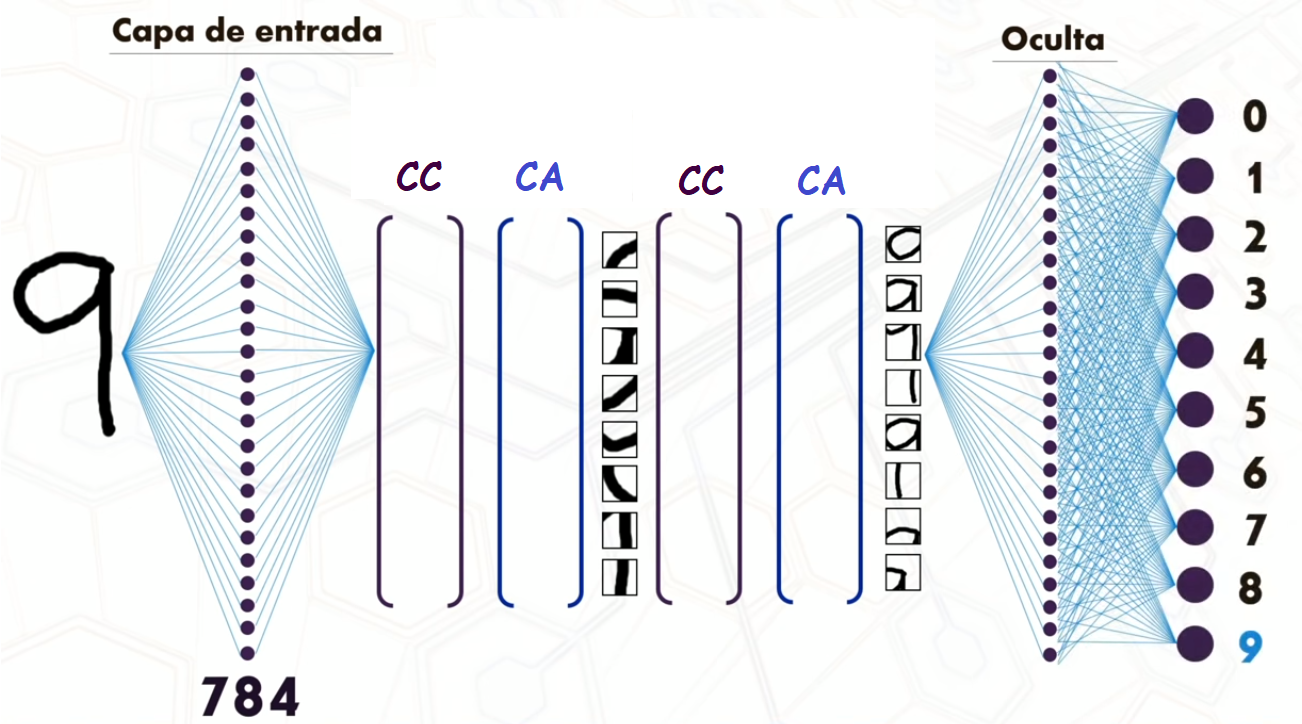


##Definición neurona simple y compleja


Las neuronas simples se encargan de detectar los ejes por medio de las convoluciones.

Las neuronas complejas se encargan de agrupar la informacion obtenida en conceptos mas concretos y ayudan a clasificar.

##Definición capa convolucional y de agrupamiento

Las capa convolucionales son las encargadas de procesar la salida de neuronas que están conectadas en regiones locales de entrada (es decir pixeles cercanos), calculando el producto escalar entre sus pesos  y una pequeña región a la que están conectados en el volumen de entrada. 

Mientras que las capas de agrupamiento son las encargadas resaltar las caracteristicas mas importante de nuestro objeto estudio eliminando caracteristicas menos relevantes

Aquí vemos un ejemplo de reconocimiento de numeros en el que sin importar como se encuentren escritos los numeros, los reconoce con un 98% de certeza.

Epoch 1/5
1875/1875 [==============================] - 16s 5ms/step - loss: 0.2699 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1172 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0842 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0691 - accuracy: 0.9787
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0949 - accuracy: 0.9716
Resultado en las pruebas:  0.9715999960899353


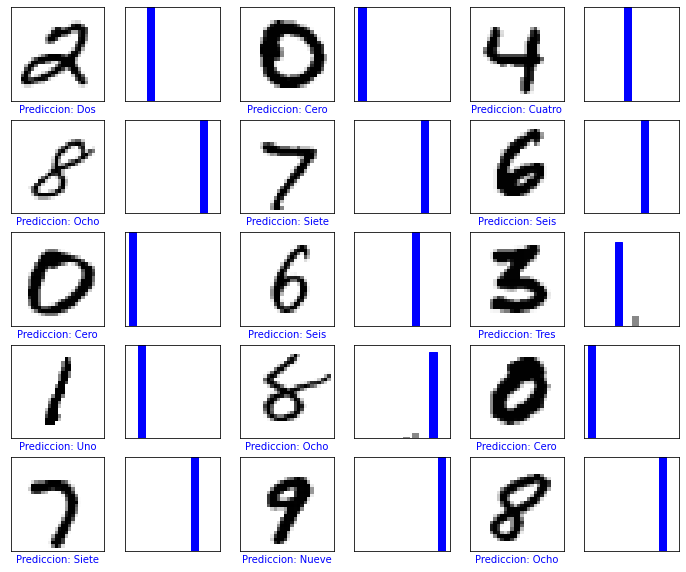

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()

logger.setLevel(logging.ERROR)


dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

class_names = [
    'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis',
    'Siete', 'Ocho', 'Nueve'
]

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

#Normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

#Estructura de la red
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28,1)),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para clasificacion
])

#Indicar las funciones a utilizar
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

#Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

#Realizar el aprendizaje
model.fit(
	train_dataset, epochs=5,
	steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE) #No sera necesario pronto
)

#Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(num_test_examples/32)
)

print("Resultado en las pruebas: ", test_accuracy)


for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()

#Conclusiones

1.  Las utilidades que tienen las redes neuronales son muy variadas, aplicadas en la medicina, la economía, la ingeniería y el analisis de datos, la biología, la toma de descisiones en finanzas, detección de fraude, entre otros.
2.  La red neuronal permite identificar patrones y características de las imágenes teniendo en cuenta que se debe entrenar para su posterior prueba. Además, se debe tener en cuenta que las imágenes deben ser uniformes en su tamaño y características, luego particionadas para su reconocimiento.
3.  La red neuronal convolucional cuenta con un potencial adicional que le permite identificar características específicas de la imagen por sí sola, sin indicarle directamente que las identifique. 
4.  Otro punto para destacar es la rapidez con que la CNN es entrenada y probada, tardando mucho menos tiempo en realizar el proceso completo sin tener una capacidad de cómputo muy elevada y obtiene mejores resultados en la identificación de patrones sin importar los cambios de forma o color de las imágenes.
5.  Durante la exposición se realizaron multiples ejemplos y nos enfocamos en 3 aplicaciones del procesamiento de imágenes. El procesamiento de imágenes ha ido evolucionando mucho en los ultimos años, gracias a los avances tecnologicos.

#Referencias



*   Garcia, D. (2001) Redes Neuronales: Conceptos Básicos y Aplicaciones
*   Loncomilla, P. (2016) Deep learning: Redes convolucionales.
*   Picazo, O. (2018) Redes Neuronales Convolucionales profundas para el reconocimiento de emociones en imagenes
*   Redes Neuronales Convolucionales - Clasificación avanzada de imágenes con IA / ML (CNN) (2021). Ringa Tech. https://www.youtube.com/watch?v=4sWhhQwHqug&t=967s
*   Tu primer clasificador de imágenes con Python y Tensorflow (2021). Ringa Tech. https://www.youtube.com/watch?v=j6eGHROLKP8&t=728s
*   Montenegro, A. Diplomado de IA y AP (2021). https://github.com/AprendizajeProfundo/Diplomado


